In [1]:
# Load the data and examine its structure
import pandas as pd
import numpy as np

# Load the CSV file
df = pd.read_csv('corporate_earnings_data.csv')

# Display the first few rows to understand the data
print(df.head())

# Check the data types and basic statistics
print("\
Data Types:")
print(df.dtypes)

print("\
Basic Statistics:")
print(df.describe())

# Check for missing values
print("\
Missing Values:")
print(df.isnull().sum())


   Year  Revenue Growth (%)  Operating Expenses ($M)  S&P 500 Index  \
0  1925            1.236204               641.431336    -126.004944   
1  1926           18.521429              3363.846851     106.854780   
2  1927           11.959818              1914.601915     169.422575   
3  1928            7.959755              2788.568110      18.341838   
4  1929           -5.319441              4584.049133     584.771064   

   Interest Rates (%)  Inflation (%)  Industry Trends  Net Income ($M)  
0            9.571220      -1.309295         7.574931         8.601650  
1            7.510021       4.594347         2.030397       160.961177  
2            5.766363       3.298366         1.222293       194.110155  
3            6.311347       8.652450        -0.898894       -35.153716  
4            4.486201       2.210980        -4.154368      -157.390794  
Data Types:
Year                         int64
Revenue Growth (%)         float64
Operating Expenses ($M)    float64
S&P 500 Index     

In [3]:
# Building an econometric model based on the corporate earnings data
# Our theoretical framework: We assume that a firm's net income is influenced by its revenue growth,operating expenses, as well as 
# macroeconomic variables such as the S&P 500 index (as a proxy for overall market performance), interest rates, inflation, and industry trends. 
# For instance, higher revenue growth can boost net income, while higher operating expenses might reduce it.
# Macro factors including interest rates and inflation can also affect profitability. 

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan

# Prepare the data
# Use relevant variables. Exclude Year since we assume a cross-sectional model on time series data may lead to autocorrelation;
# we can use it in a time series variant.

predictors = ['Revenue Growth (%)', 'Operating Expenses ($M)', 'S&P 500 Index', 'Interest Rates (%)', 'Inflation (%)', 'Industry Trends']

# Create X and y
y = df['Net Income ($M)']
X = df[predictors]

# Add constant
X_const = sm.add_constant(X)

# Fit the model using OLS
model = sm.OLS(y, X_const).fit()
print(model.summary())

# Diagnostic Tests
# 1. Multicollinearity: Calculate Variance Inflation Factor (VIF)
print('\
Variance Inflation Factors:')
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif_data)

# 2. Autocorrelation: Durbin Watson test
dw = durbin_watson(model.resid)
print('\
Durbin-Watson statistic: ' + str(dw))

# 3. Heteroscedasticity: Breusch-Pagan test
bp_test = het_breuschpagan(model.resid, X_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print('\
Breusch-Pagan test results:')
for name, value in zip(labels, bp_test):
    print(name + ': ' + str(value))

print('\
Model building and diagnostics complete.')

                            OLS Regression Results                            
Dep. Variable:        Net Income ($M)   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     190.0
Date:                Tue, 18 Mar 2025   Prob (F-statistic):           6.29e-50
Time:                        20:02:46   Log-Likelihood:                -531.81
No. Observations:                 100   AIC:                             1078.
Df Residuals:                      93   BIC:                             1096.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Dataframe head:
   Year  Revenue Growth (%)  Operating Expenses ($M)  S&P 500 Index  \
0  1925            1.236204               641.431336    -126.004944   
1  1926           18.521429              3363.846851     106.854780   
2  1927           11.959818              1914.601915     169.422575   
3  1928            7.959755              2788.568110      18.341838   
4  1929           -5.319441              4584.049133     584.771064   

   Interest Rates (%)  Inflation (%)  Industry Trends  Net Income ($M)  
0            9.571220      -1.309295         7.574931         8.601650  
1            7.510021       4.594347         2.030397       160.961177  
2            5.766363       3.298366         1.222293       194.110155  
3            6.311347       8.652450        -0.898894       -35.153716  
4            4.486201       2.210980        -4.154368      -157.390794  


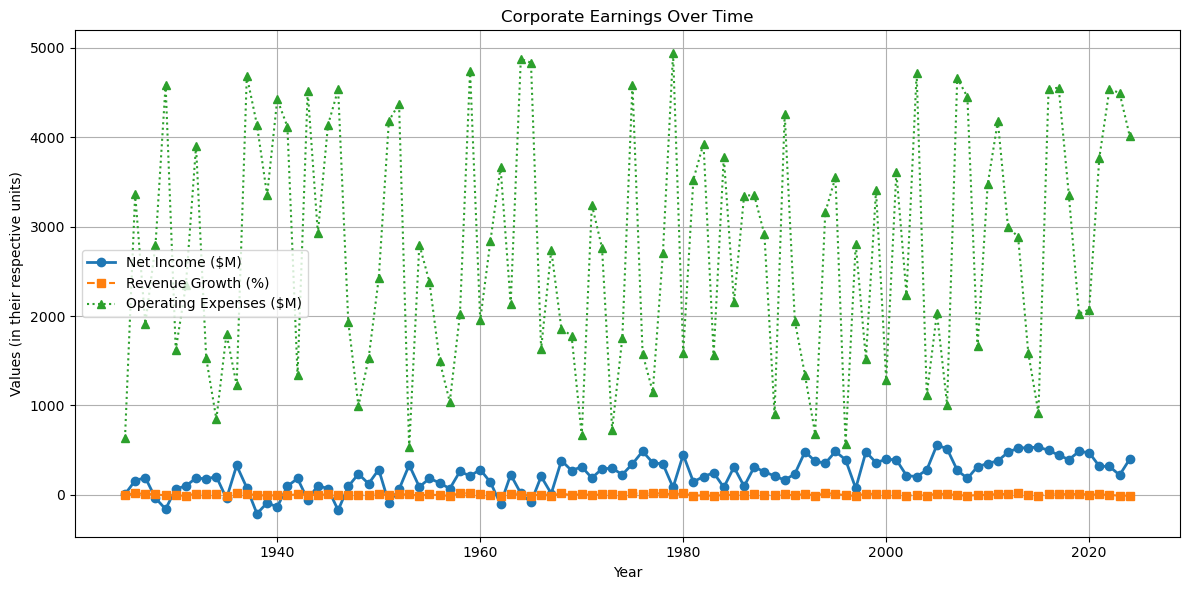

In [11]:
# First cell: Load the dataframe from the CSV file
import pandas as pd

df = pd.read_csv('corporate_earnings_data.csv', encoding='ascii')

# Show the head to verify the dataframe
print('Dataframe head:')
print(df.head())

# Second cell: Create a time series plot using dependent and independent variables
import matplotlib.pyplot as plt

# Convert 'Year' to integer if needed
if not pd.api.types.is_integer_dtype(df['Year']):
    df['Year'] = df['Year'].astype(int)

# Sort dataframe by Year to ensure the time series order
df = df.sort_values('Year')

plt.figure(figsize=(12, 6))

# Plot the dependent variable: Net Income ($M)
plt.plot(df['Year'], df['Net Income ($M)'], marker='o', label='Net Income ($M)', linewidth=2)

# For demonstration, include two independent variables: Revenue Growth (%) and Operating Expenses ($M)
plt.plot(df['Year'], df['Revenue Growth (%)'], marker='s', label='Revenue Growth (%)', linestyle='--')
plt.plot(df['Year'], df['Operating Expenses ($M)'], marker='^', label='Operating Expenses ($M)', linestyle=':')

plt.xlabel('Year')
plt.ylabel('Values (in their respective units)')
plt.title('Corporate Earnings Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

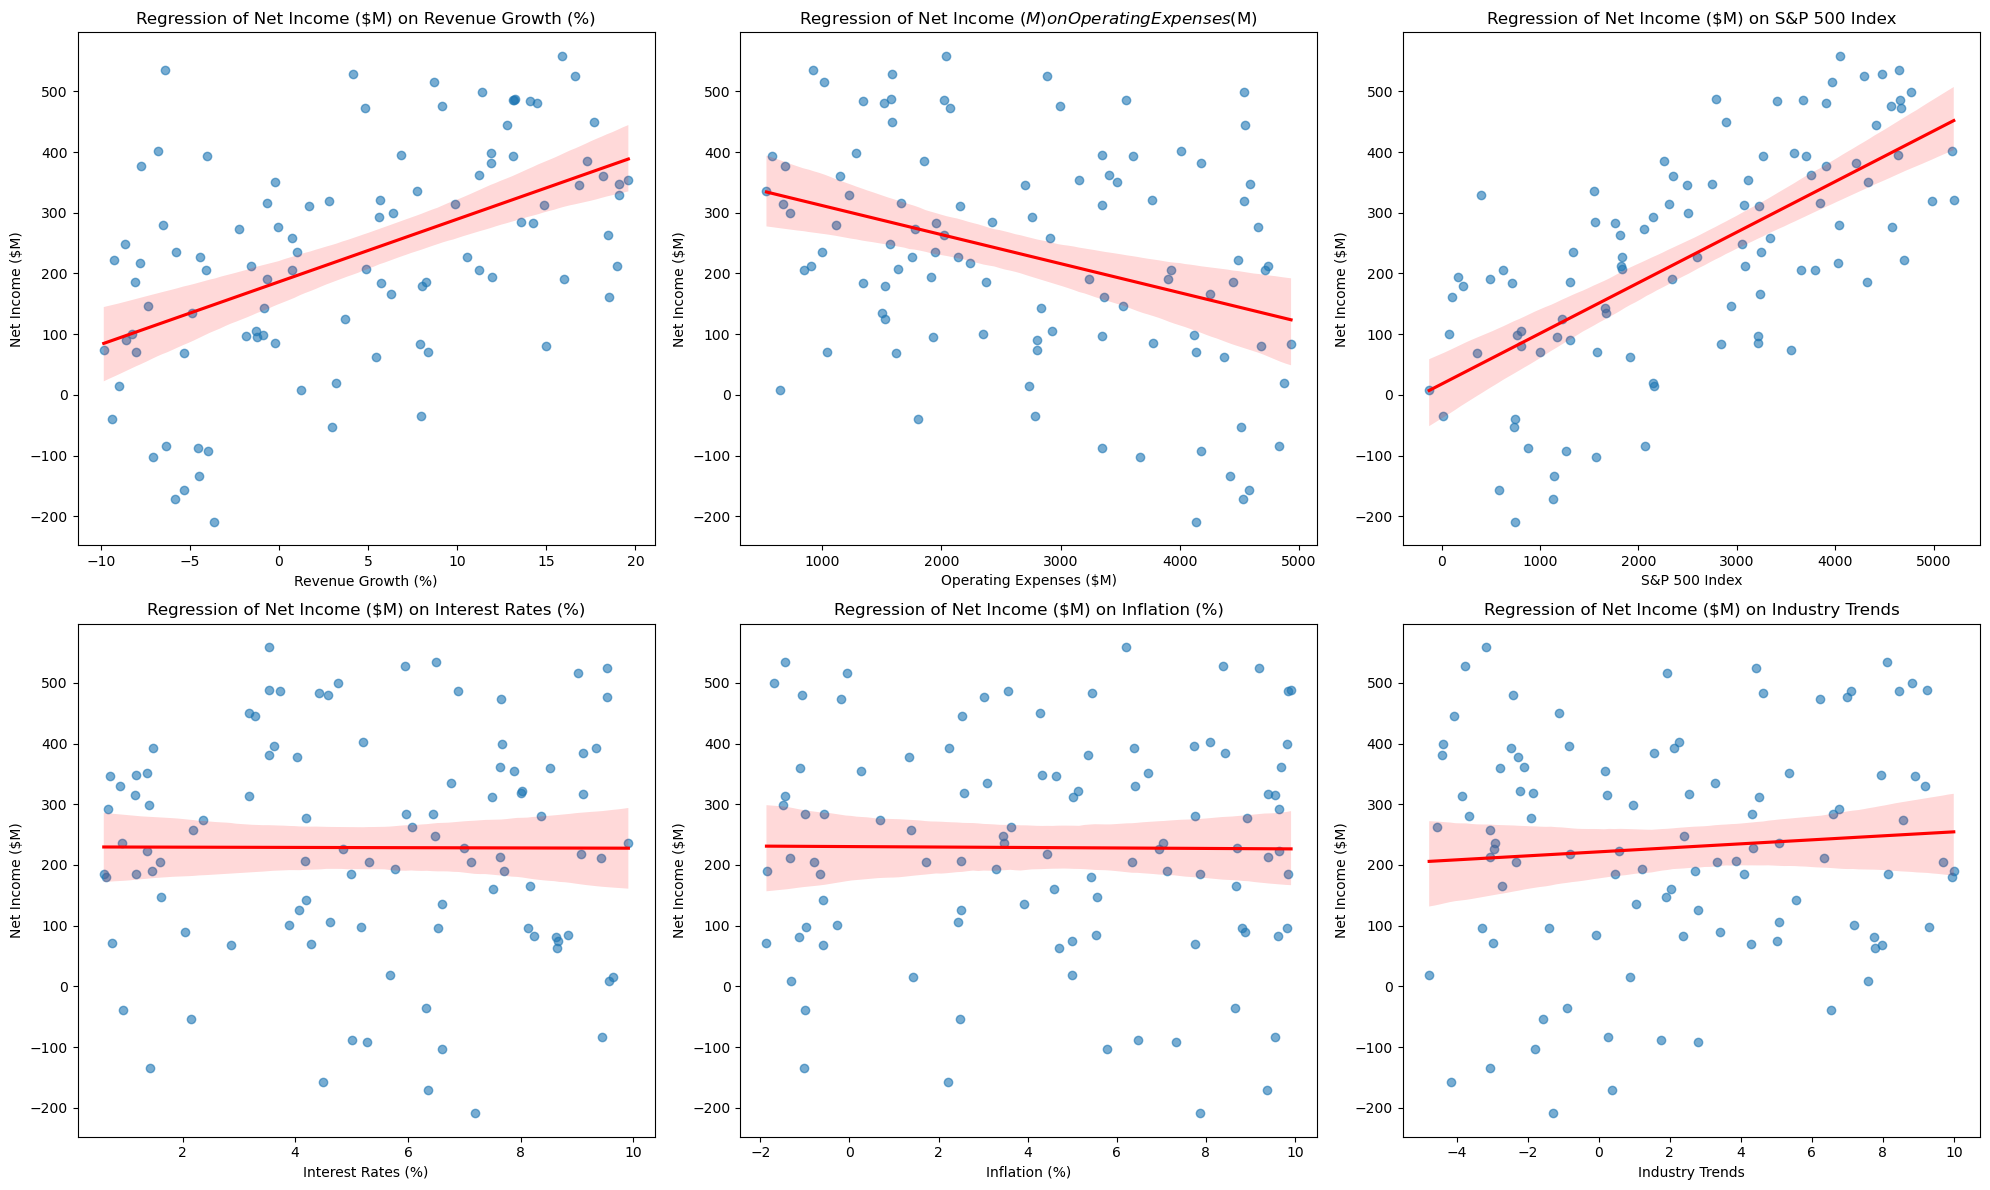

In [3]:
# Load the corporate earnings data again to make sure df is defined
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('corporate_earnings_data.csv')

# Define dependent variable and independent variables
dep_var = 'Net Income ($M)'
indep_vars = ['Revenue Growth (%)', 'Operating Expenses ($M)', 'S&P 500 Index', 'Interest Rates (%)', 'Inflation (%)', 'Industry Trends']

# Create subplots, 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Loop through independent variables and create regression plots
for i, var in enumerate(indep_vars):
    sns.regplot(x=var, y=dep_var, data=df, ax=axes[i], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
    axes[i].set_title('Regression of ' + dep_var + ' on ' + var)

plt.tight_layout()
plt.show()

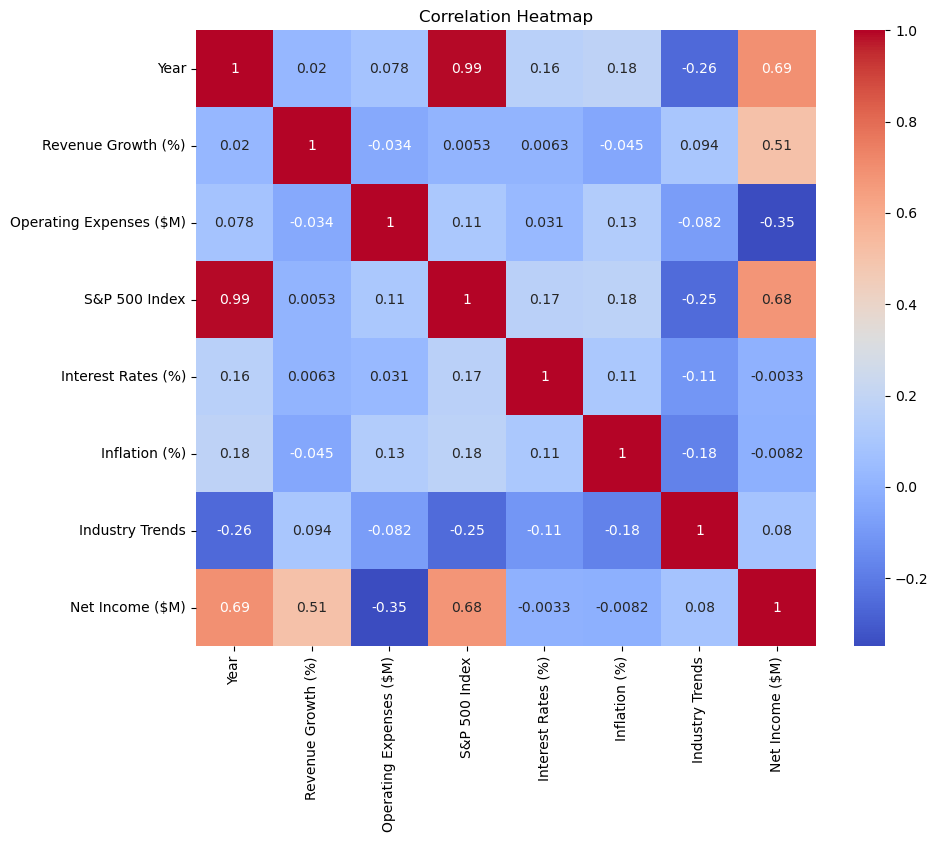

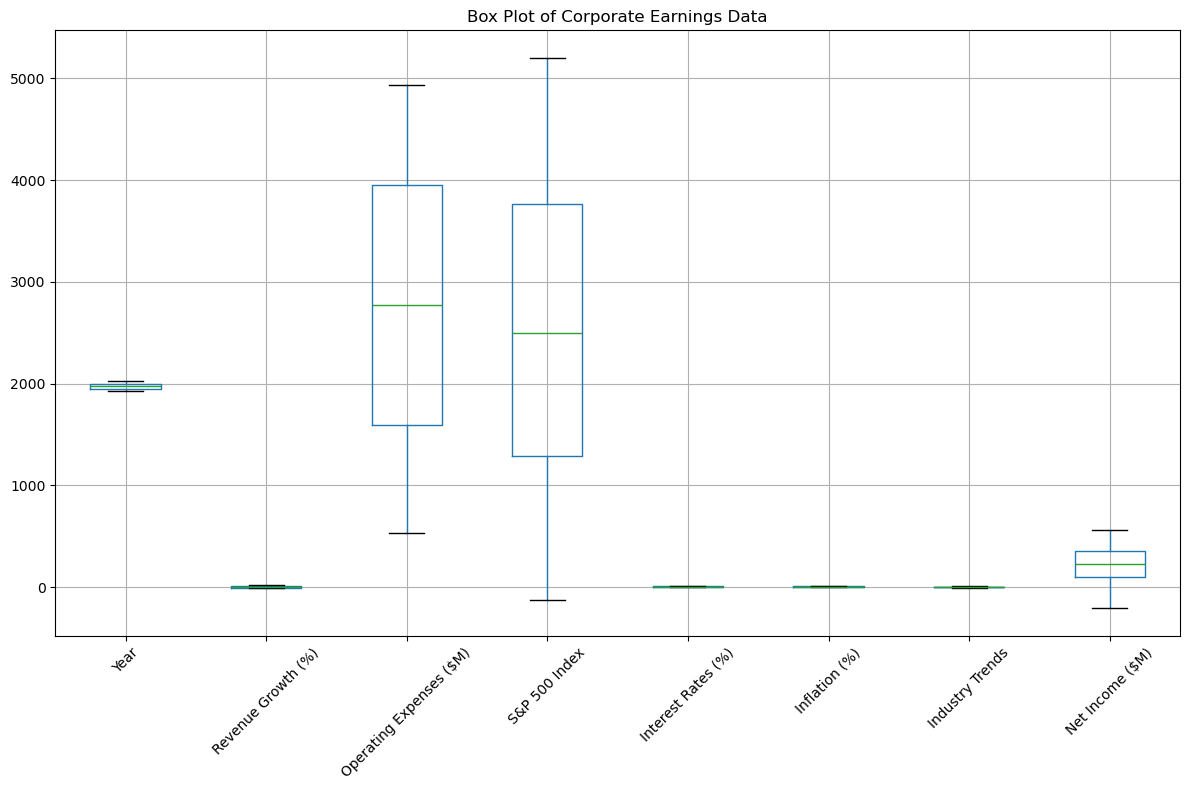

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("corporate_earnings_data.csv")

# Plot the correlation heat map
plt.figure(figsize=(10, 8))
corr = data.corr()  # Compute the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Plot the box plot for all numeric columns
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title("Box Plot of Corporate Earnings Data")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()